Import CDF

In [1]:
# The latest CDF library https://spdf.gsfc.nasa.gov/pub/software/cdf/dist/latest/
from spacepy import pycdf
import os
os.environ["CDF_LIB"] = "C:\\Program Files\\CDF_Distribution\\cdf39_0-dist\\lib"

Import local libs

In [2]:
import sys

# import JUICE lib
sys.path.append('../lib/')

import juice_cdf_lib as juice_cdf


In [3]:
import matplotlib.pyplot as plt
import numpy as np

Read CDF file for SID3

In [4]:
#cdf_dir = 'G:\\.shortcut-targets-by-id\\1uqKTu2OrJCcCWYGD21lZau5jg5tvzx6O\\TU_C_staffs\\C - 飛翔体\\JUICE\\data 202304-5 NECP\\Data-CDF\\202305\\'
cdf_dir = 'C:\\Users\\tsuch\\VSCode\\python\\juice\\data\\Data-sample-v0.2.0\\202305\\'
cdf_file = cdf_dir + 'JUICE_L1a_RPWI-HF-SID3_20230523T102036-20230523T102247_V01___RPR1_52000000_2023.143.10.24.52.503.cdf'
cdf = pycdf.CDF(cdf_file)

spec = juice_cdf.juice_getdata_hf_sid03(cdf)

# Conversion factor (Raw value @ ADC input to dBm)
cf = -104.1

EuEu = 10*np.log10(spec.EuEu) + cf
EvEv = 10*np.log10(spec.EvEv) + cf
EwEw = 10*np.log10(spec.EwEw) + cf
freq = spec.frequency[:][0]


ValueError: cannot delete array elements

In [ ]:
print(spec.frequency.shape)
print(EuEu.shape)
print(EuEu[:][0].shape)
print(np.min(spec.EuEu))

cdf

(39, 256)
(39, 256)
(256,)
nan


<CDF:
B0_repeat: CDF_UINT1 [39]
B0_startf: CDF_UINT2 [39]
B0_step: CDF_UINT2 [39]
B0_stopf: CDF_UINT2 [39]
B0_subdiv: CDF_UINT1 [39]
B1_repeat: CDF_UINT1 [39]
B1_startf: CDF_UINT2 [39]
B1_step: CDF_UINT2 [39]
B1_stopf: CDF_UINT2 [39]
B1_subdiv: CDF_UINT1 [39]
B2_repeat: CDF_UINT1 [39]
B2_startf: CDF_UINT2 [39]
B2_step: CDF_UINT2 [39]
B2_stopf: CDF_UINT2 [39]
B2_subdiv: CDF_UINT1 [39]
B3_repeat: CDF_UINT1 [39]
B3_startf: CDF_UINT2 [39]
B3_step: CDF_UINT2 [39]
B3_stopf: CDF_UINT2 [39]
B3_subdiv: CDF_UINT1 [39]
B4_repeat: CDF_UINT1 [39]
B4_startf: CDF_UINT2 [39]
B4_step: CDF_UINT2 [39]
B4_stopf: CDF_UINT2 [39]
B4_subdiv: CDF_UINT1 [39]
BG_downlink: CDF_UINT1 [39]
BG_select: CDF_UINT1 [39]
BG_subtract: CDF_UINT1 [39]
Epoch: CDF_TIME_TT2000 [39]
EuEu: CDF_REAL4 [39, 256]
EuEv_im: CDF_REAL4 [39, 256]
EuEv_re: CDF_REAL4 [39, 256]
EvEv: CDF_REAL4 [39, 256]
EvEw_im: CDF_REAL4 [39, 256]
EvEw_re: CDF_REAL4 [39, 256]
EwEu_im: CDF_REAL4 [39, 256]
EwEu_re: CDF_REAL4 [39, 256]
EwEw: CDF_REAL4 [39, 25

<bound method Figure.show of <Figure size 576x576 with 3 Axes>>

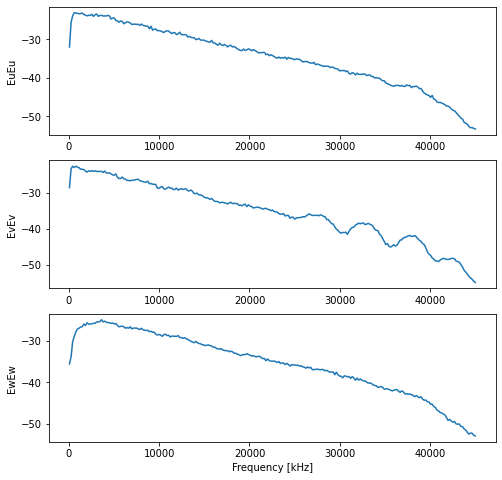

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
ax1.plot(freq, EuEu[:][0])
ax2.plot(freq, EvEv[:][0])
ax3.plot(freq, EwEw[:][0])

ax3.set_xlabel('Frequency [kHz]')
ax1.set_ylabel('EuEu')
ax2.set_ylabel('EvEv')
ax3.set_ylabel('EwEw')
fig.show

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4292\4209190505.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p1 = ax1.pcolormesh(spec.epoch, freq, EuEu.transpose())
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4292\4209190505.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p2 = ax2.pcolormesh(spec.epoch, freq, EvEv.transpose())
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4292\4209190505.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This

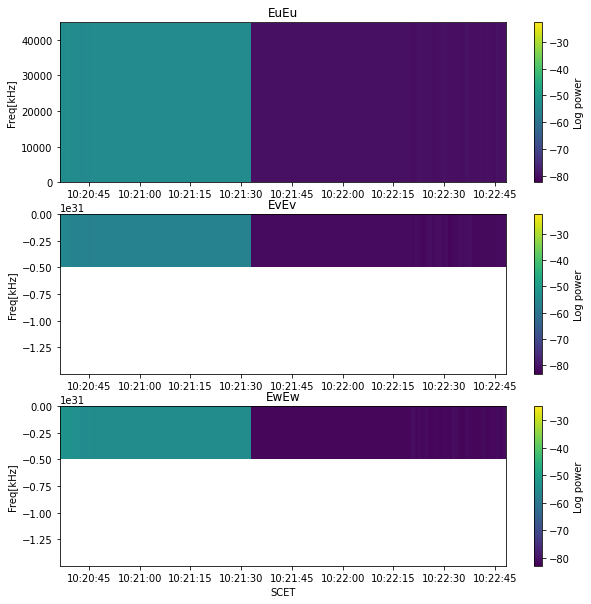

In [ ]:
fig2d = plt.figure(figsize=[10, 10])
ax1 = fig2d.add_subplot(3, 1, 1)
ax2 = fig2d.add_subplot(3, 1, 2)
ax3 = fig2d.add_subplot(3, 1, 3)
p1 = ax1.pcolormesh(spec.epoch, freq, EuEu.transpose())
p2 = ax2.pcolormesh(spec.epoch, freq, EvEv.transpose())
p3 = ax3.pcolormesh(spec.epoch, freq, EwEw.transpose())
ax1.set_title('EuEu')
ax2.set_title('EvEv')
ax3.set_title('EwEw')
ax3.set_xlabel('SCET')
ax1.set_ylabel('Freq[kHz]')
ax2.set_ylabel('Freq[kHz]')
ax3.set_ylabel('Freq[kHz]')
pp1 = fig.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label('Log power')
pp2 = fig.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label('Log power')
pp3 = fig.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label('Log power')

plt.show()
